<a href="https://colab.research.google.com/github/mille055/ct_protocol/blob/main/notebooks/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mille055/ct_protocol.git


Cloning into 'ct_protocol'...
remote: Enumerating objects: 319, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 319 (delta 123), reused 171 (delta 117), pack-reused 134
Receiving objects: 100% (319/319), 2.23 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (204/204), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [21]:
# get results dataframes
results_bm_df = pd.read_csv('/content/ct_protocol/data/results_basemodel_shortprompt.csv')
results_bm_df.iloc[:5]

,index,protocol,predicted_protocol,order,predicted_order,comments,predicted_comments,score
0,0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9
1,1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast,[],[''],0.8
2,2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9
3,3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9
4,4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT abdomen pelvis with contrast,[],['oral contrast'],0.8


In [26]:
results_ft_df = pd.read_csv('/content/ct_protocol/data/results_postFT.csv')
new_column_names = ['ft_' + column for column in results_ft_df.columns]
results_ft_df.columns = new_column_names
results_ft_df['index'] = results_ft_df['ft_index']
results_ft_df.head()

,ft_index,ft_protocol,ft_predicted_protocol,ft_order,ft_predicted_order,ft_comments,ft_predicted_comments,ft_score,index
0,0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,0
1,1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast w MIPS,[],[],1.0,1
2,2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,2
3,3,routine,renal stone,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],0.5,3
4,4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT RCC protocol incl chest w MIPS and dual abd...,[],[],1.0,4


In [27]:
results_df = results_bm_df.merge(results_ft_df, on='index')
results_df.head()

,index,protocol,predicted_protocol,order,predicted_order,comments,predicted_comments,score,ft_index,ft_protocol,ft_predicted_protocol,ft_order,ft_predicted_order,ft_comments,ft_predicted_comments,ft_score
0,0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0
1,1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast,[],[''],0.8,1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast w MIPS,[],[],1.0
2,2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0
3,3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,3,routine,renal stone,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],0.5
4,4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT abdomen pelvis with contrast,[],['oral contrast'],0.8,4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT RCC protocol incl chest w MIPS and dual abd...,[],[],1.0


In [32]:

results_df['bm_protocol_correct'] = results_df['protocol'] == results_df['predicted_protocol']
bm_protocol_accuracy = results_df['bm_protocol_correct'].mean()
print(f"Accuracy for BM protocol prediction: {bm_protocol_accuracy:.2f}")


Accuracy for BM protocol prediction: 0.73


In [33]:

results_df['ft_protocol_correct'] = results_df['protocol'] == results_df['ft_predicted_protocol']
ft_protocol_accuracy = results_df['ft_protocol_correct'].mean()
print(f"Accuracy for Fine-tuned protocol prediction: {ft_protocol_accuracy:.2f}")

Accuracy for Fine-tuned protocol prediction: 0.94


In [35]:
ft_model_incorrect = results_df[results_df['ft_protocol_correct'] == False]
ft_model_incorrect

,index,protocol,predicted_protocol,order,predicted_order,comments,predicted_comments,score,ft_index,ft_protocol,ft_predicted_protocol,ft_order,ft_predicted_order,ft_comments,ft_predicted_comments,ft_score,bm_protocol_correct,ft_protocol_correct
3,3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,3,routine,renal stone,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],0.5,True,False
15,15,gu,routine,CT abdomen pelvis with and without contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.3,15,gu,rcc,CT abdomen pelvis with and without contrast,CT abdomen pelvis with contrast,[],[],0.4,False,False
21,21,routine,noncon,CT chest abdomen pelvis without contrast with ...,CT chest abdomen pelvis without contrast,[],[],0.4,21,routine,noncon,CT chest abdomen pelvis without contrast with ...,CT chest abdomen pelvis without contrast with ...,[],[],0.5,False,False
29,29,gu,routine,CT abdomen pelvis with and without contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.3,29,gu,routine,CT abdomen pelvis with and without contrast,CT abdomen pelvis with contrast,[],[],0.4,False,False
36,36,routine,trauma,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast,['split'],[''],0.3,36,routine,trauma,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast w MIPS,['split'],[],0.4,False,False
75,75,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[''],0.9,75,routine,pancreas,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],0.5,True,False
80,80,radio embo,hepatic resection,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.4,80,radio embo,hepatic resection,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],0.5,False,False
87,87,cirrhosis,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with oral contrast,[],['oral contrast'],0.3,87,cirrhosis,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],0.5,False,False
96,96,routine,crohns,CT abdomen pelvis with contrast,CT abdomen with contrast,['md check for drain'],['oral contrast'],0.3,96,routine,crohns,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,['md check for drain'],[],0.4,False,False
136,136,routine,NaN,CT abdomen pelvis with contrast,NaN,[],NaN,0.0,136,routine,crohns,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],0.5,False,False


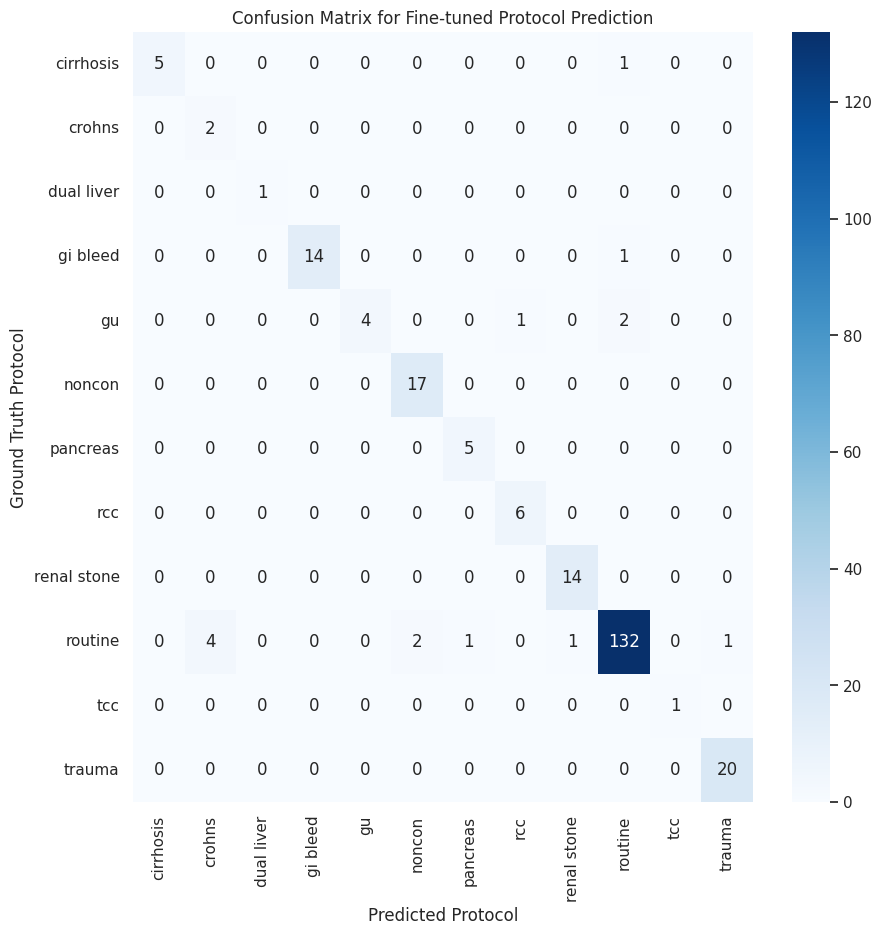

In [51]:



# Extract the ground truth labels and predicted labels
ground_truth = results_df['protocol']
predictions = results_df['ft_predicted_protocol']

# Find the common protocols present in both ground_truth and predictions
common_protocols = np.intersect1d(ground_truth.unique(), predictions.unique())

# Filter the ground_truth and predictions to only include the common protocols
filtered_ground_truth = ground_truth[ground_truth.isin(common_protocols)]
filtered_predictions = predictions[ground_truth.isin(common_protocols)]

# Create the confusion matrix for filtered labels
cm = confusion_matrix(filtered_ground_truth, filtered_predictions, labels=common_protocols)

# Plot the confusion matrix with labels for common protocols
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=common_protocols, yticklabels=common_protocols)
plt.xlabel('Predicted Protocol')
plt.ylabel('Ground Truth Protocol')
plt.title('Confusion Matrix for Fine-tuned Protocol Prediction')

# Save the figure
plt.savefig('/content/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()